In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = "../../../"
DATA_DIR = os.path.join(BASE_DIR, "data/")

## Task 1: Improving the accuracy of our logistic regression on MNIST

We got the accuracy of ~90% on our MNIST dataset with our vanilla model, which is
unacceptable. 

The dataset is basically solved and state of the art models <a href="http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html">reach accuracies above
99%</a> . 

You can use whatever loss functions, optimizers, even models that you want, as long as
your model is built in TensorFlow. 

You can save your code in the file q2.py. In the comments,
explain what you decided to do, instruction on how to run your code, and report your results.

I’m happy if you can reach 97%.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(os.path.join(DATA_DIR, "MNIST_data/"), one_hot=True)

Extracting ../../../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../../data/MNIST_data/t10k-labels-idx1-ubyte.gz


### Approach: Three-layer Neural Network

In [4]:
# Data Params
numTrainingSamples = mnist.train.images.shape[0] # 55000
numFeatures = mnist.train.images.shape[1] # 784
numClasses = mnist.train.labels.shape[1] # 10

# Network Params
numHiddenUnits1 = 200
numHiddenUnits2 = 200
numHiddenUnits3 = 200
numEpochs = 10000
batchSize = 200

In [5]:
X = tf.placeholder(tf.float32, shape=[None, numFeatures])
y = tf.placeholder(tf.float32, shape=[None, numClasses])

In [6]:
def layer_weight(inputDim, outputDim):
    return tf.Variable(tf.truncated_normal([inputDim, outputDim], stddev=0.1, seed=1))

def layer_bias(dim):
    return tf.Variable(tf.constant(0.1), [dim])

def network_layer(layerInput, weight, bias):
    layerOutput = tf.nn.relu(tf.matmul(layerInput, weight) + bias)
    return layerOutput

In [7]:
weights = {
    'hidden1': layer_weight(numFeatures, numHiddenUnits1),
    'hidden2': layer_weight(numHiddenUnits1, numHiddenUnits2),
    'hidden3': layer_weight(numHiddenUnits2, numHiddenUnits3),
    'output': layer_weight(numHiddenUnits3, numClasses)
}

biases = {
    'hidden1': layer_bias(numHiddenUnits1),
    'hidden2': layer_bias(numHiddenUnits2),
    'hidden3': layer_bias(numHiddenUnits3),
    'output': layer_bias(numClasses),
}

In [8]:
hiddenLayer1Output = network_layer(X, weights['hidden1'], biases['hidden1'])
hiddenLayer2Output = network_layer(hiddenLayer1Output, weights['hidden2'], biases['hidden2'])
hiddenLayer3Output = network_layer(hiddenLayer2Output, weights['hidden3'], biases['hidden3'])
finalOutput = network_layer(hiddenLayer3Output, weights['output'], biases['output'])

In [9]:
correct_prediction = tf.equal(tf.argmax(finalOutput,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [10]:
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=y,
        logits=finalOutput
    )
)

optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [11]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(numEpochs):
    batch = mnist.train.next_batch(batch_size=batchSize)
    sess.run(optimizer, feed_dict={X: batch[0], y: batch[1]})
    if ((i+1)<10 or (i+1)%1000 == 0):
        batch_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1]})
        print("Iteration %s, training accuracy: %s" % ((i+1), batch_accuracy))

Iteration 1, training accuracy: 0.21
Iteration 2, training accuracy: 0.245
Iteration 3, training accuracy: 0.385
Iteration 4, training accuracy: 0.325
Iteration 5, training accuracy: 0.325
Iteration 6, training accuracy: 0.415
Iteration 7, training accuracy: 0.42
Iteration 8, training accuracy: 0.37
Iteration 9, training accuracy: 0.455
Iteration 1000, training accuracy: 0.965
Iteration 2000, training accuracy: 0.995
Iteration 3000, training accuracy: 1.0
Iteration 4000, training accuracy: 1.0
Iteration 5000, training accuracy: 1.0
Iteration 6000, training accuracy: 1.0
Iteration 7000, training accuracy: 1.0
Iteration 8000, training accuracy: 1.0
Iteration 9000, training accuracy: 1.0
Iteration 10000, training accuracy: 1.0


In [12]:
training_accuracy = accuracy.eval(feed_dict={
    X: mnist.train.images, 
    y: mnist.train.labels
})*100
testing_accuracy = accuracy.eval(feed_dict={
    X: mnist.test.images, 
    y: mnist.test.labels
})*100


mnist_predictions = sess.run(tf.argmax(
    tf.nn.softmax(finalOutput), 1
), feed_dict={X: mnist.test.images})
mnist_labels = sess.run(tf.argmax(mnist.test.labels, 1))

print("===========================================================================")
print("===== Three-layer Neural Network with %s+%s+%s HU on MNIST dataset =====" % 
      (numHiddenUnits1, numHiddenUnits2, numHiddenUnits3)
)
print("===========================================================================")
print("Training accuracy:\t %.3f %%" % training_accuracy)
print("Testing accuracy:\t %.3f %%" % testing_accuracy)

print("\nConfusion Matrix: \n")
print(sess.run(tf.confusion_matrix(labels=mnist_labels, predictions=mnist_predictions)))

===== Three-layer Neural Network with 200+200+200 HU on MNIST dataset =====
Training accuracy:	 99.985 %
Testing accuracy:	 97.860 %

Confusion Matrix: 

[[ 965    0    3    0    1    3    4    1    2    1]
 [   0 1125    1    1    0    2    1    1    3    1]
 [   5    2 1001    9    4    0    0    4    7    0]
 [   2    0    4  995    0    2    0    3    4    0]
 [   1    0    4    1  964    0    3    2    1    6]
 [   3    0    0   12    2  867    2    1    3    2]
 [   4    2    0    1    9    3  936    1    2    0]
 [   1    6    7    4    3    1    0 1002    2    2]
 [   4    0    2    6    3    2    1    2  950    4]
 [   1    2    0    5   10    2    1    4    3  981]]


## Task 2: Three-layer Neural Net on the notMNIST dataset

In [13]:
not_mnist = input_data.read_data_sets(os.path.join(DATA_DIR, "notMNIST_data/"), one_hot=True)

Extracting ../../../data/notMNIST_data/train-images-idx3-ubyte.gz
Extracting ../../../data/notMNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../../data/notMNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../../data/notMNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
print(not_mnist.train.images.shape)
print(not_mnist.train.labels.shape)
print(not_mnist.test.images.shape)
print(not_mnist.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [15]:
indexToCharacter = [
    'A', 'B', 'C', 'D', 'E',
    'F', 'G', 'H', 'I', 'J'
]

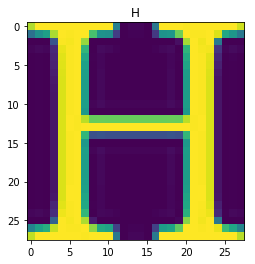

In [16]:
plt.imshow(not_mnist.test.images[-1].reshape(28, 28))
plt.title(indexToCharacter[not_mnist.test.labels[-1].argmax()])
plt.show()

In [17]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(numEpochs):
    batch = not_mnist.train.next_batch(batch_size=batchSize)
    sess.run(optimizer, feed_dict={X: batch[0], y: batch[1]})
    if ((i+1)<10 or (i+1)%1000 == 0):
        batch_accuracy = accuracy.eval(feed_dict={X: batch[0], y: batch[1]})
        print("Iteration %s, training accuracy: %s" % ((i+1), batch_accuracy))

Iteration 1, training accuracy: 0.17
Iteration 2, training accuracy: 0.195
Iteration 3, training accuracy: 0.215
Iteration 4, training accuracy: 0.2
Iteration 5, training accuracy: 0.255
Iteration 6, training accuracy: 0.285
Iteration 7, training accuracy: 0.24
Iteration 8, training accuracy: 0.345
Iteration 9, training accuracy: 0.28
Iteration 1000, training accuracy: 0.875
Iteration 2000, training accuracy: 0.915
Iteration 3000, training accuracy: 0.92
Iteration 4000, training accuracy: 0.945
Iteration 5000, training accuracy: 0.925
Iteration 6000, training accuracy: 0.96
Iteration 7000, training accuracy: 0.95
Iteration 8000, training accuracy: 0.94
Iteration 9000, training accuracy: 0.975
Iteration 10000, training accuracy: 0.965


In [18]:
training_accuracy = accuracy.eval(feed_dict={
    X: not_mnist.train.images, 
    y: not_mnist.train.labels
})*100
testing_accuracy = accuracy.eval(feed_dict={
    X: not_mnist.test.images, 
    y: not_mnist.test.labels
})*100

not_mnist_predictions = sess.run(tf.argmax(
    tf.nn.softmax(finalOutput), 1
), feed_dict={X: not_mnist.test.images})

not_mnist_labels = sess.run(tf.argmax(not_mnist.test.labels, 1))

print("==============================================================================")
print("===== Three-layer Neural Network with %s+%s+%s HU on notMNIST dataset =====" % 
      (numHiddenUnits1, numHiddenUnits2, numHiddenUnits3)
)
print("==============================================================================")
print("Training accuracy:\t %.3f %%" % training_accuracy)
print("Testing accuracy:\t %.3f %%" % testing_accuracy)

print("\nConfusion Matrix: \n")
print(sess.run(tf.confusion_matrix(labels=not_mnist_labels, predictions=not_mnist_predictions)))

===== Three-layer Neural Network with 200+200+200 HU on notMNIST dataset =====
Training accuracy:	 95.202 %
Testing accuracy:	 93.600 %

Confusion Matrix: 

[[944   9   0   4   2   0  11  18   8   4]
 [ 11 938   3  16   6   1   7   8   8   2]
 [  5   2 941   4  18   4  15   3   8   0]
 [ 10  17   2 944   2   2   4   5   5   9]
 [ 12  11  14   3 928   7  18   2   3   2]
 [  7   1   4   5  12 937  10   2  15   7]
 [  8   8  18   4   9   8 934   4   5   2]
 [ 21  15   1   3   5   5   5 940   5   0]
 [ 18   5   1  18   9   6   7   3 912  21]
 [ 16   0   1   5   3   8   4   5  16 942]]


## Task 3: Logistic regression model on coronary heart disease dataset

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [20]:
heart_disease = pd.read_csv(os.path.join(DATA_DIR, "heart.csv"))
heart_disease['famhist'] = heart_disease['famhist'].apply(
    lambda x: 1.0 if x=='Present' else 0.0
)
heart_disease.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1.0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0.0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1.0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1.0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1.0,60,25.99,57.34,49,1


In [21]:
heart_disease_data = heart_disease.as_matrix(
    ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
)
heart_disease_data = normalize(heart_disease_data)

heart_disease_target = np.array(
    [[0., 1.] if ele==1 else [1., 0.] for ele in heart_disease['chd']], 
    dtype="float32"
)

In [22]:
heart_disease_data[0]

array([ 0.78536336,  0.05890225,  0.02812583,  0.11343592,  0.00490852,
        0.24051753,  0.12418558,  0.47710824,  0.25524309])

In [23]:
print(heart_disease_data.shape, heart_disease_target.shape)

((462, 9), (462, 2))


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    heart_disease_data, 
    heart_disease_target, 
    train_size=0.8, 
    random_state=1
)

In [25]:
numFeatures = X_train.shape[1]
numClasses = y_train.shape[1]

numEpochs = 50000
learning_rate = 0.5

In [26]:
X = tf.placeholder(tf.float32, [None, numFeatures])
y = tf.placeholder(tf.float32, [None, numClasses])

In [27]:
W = tf.Variable(tf.truncated_normal([numFeatures, numClasses], stddev=0.1, seed=1))
b = tf.Variable(tf.constant(0.1), [numClasses])

In [28]:
y_prediction = tf.matmul(X, W) + b

In [29]:
correct_prediction = tf.equal(tf.argmax(y_prediction,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [30]:
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=y,
        logits=y_prediction
    )
)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [31]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(numEpochs):
    sess.run(optimizer, feed_dict={X: X_train, y: y_train})
    if ((i+1)<10 or (i+1)%5000==0):
        training_accuracy = accuracy.eval(feed_dict={X: X_train, y: y_train})
        print("Iteration %s, training accuracy: %s" % ((i+1), training_accuracy))

Iteration 1, training accuracy: 0.365854
Iteration 2, training accuracy: 0.639566
Iteration 3, training accuracy: 0.639566
Iteration 4, training accuracy: 0.639566
Iteration 5, training accuracy: 0.639566
Iteration 6, training accuracy: 0.639566
Iteration 7, training accuracy: 0.639566
Iteration 8, training accuracy: 0.639566
Iteration 9, training accuracy: 0.639566
Iteration 5000, training accuracy: 0.680217
Iteration 10000, training accuracy: 0.699187
Iteration 15000, training accuracy: 0.712737
Iteration 20000, training accuracy: 0.715447
Iteration 25000, training accuracy: 0.720867
Iteration 30000, training accuracy: 0.715447
Iteration 35000, training accuracy: 0.718157
Iteration 40000, training accuracy: 0.720867
Iteration 45000, training accuracy: 0.720867
Iteration 50000, training accuracy: 0.718157


In [32]:
training_accuracy = accuracy.eval(feed_dict={
    X: X_train, 
    y: y_train
})*100
testing_accuracy = accuracy.eval(feed_dict={
    X: X_test, 
    y: y_test
})*100

predictions = sess.run(tf.argmax(
    tf.nn.softmax(y_prediction), 1
), feed_dict={X: X_test})

labels = sess.run(tf.argmax(y_test, 1))

print("=================================================================")
print("===== Logistic Regression on coronary heart disease dataset =====")
print("=================================================================")
print("Training accuracy:\t %.3f %%" % training_accuracy)
print("Testing accuracy:\t %.3f %%" % testing_accuracy)

print("\nConfusion Matrix: \n")
print(sess.run(tf.confusion_matrix(labels=labels, predictions=predictions)))

===== Logistic Regression on coronary heart disease dataset =====
Training accuracy:	 71.816 %
Testing accuracy:	 72.043 %

Confusion Matrix: 

[[58  8]
 [18  9]]
